In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Modeling stock prices (simple model)

Suppose that we are interested in investing in a specific stock. We want to predict what the future price might be with some probability in order for us to determine whether or not we should invest.


The simplest way to model the movement of the price of an asset in a market with no moving forces is to assume that the price changes with some random magnitude and direction, following a random walk model. 

$$p_{t} =  p_{t-1} + \delta p $$

We model the magnitude of the price change with the roll of a die. The function `dice` "rolls" an integer number from 1 to 6.

In [2]:
def dice():
    return np.random.randint(1,7)

To model prices increasing or decreasing, we will use the "flip" of a coin. The function `flip` returns either $-1$ (decreasing price) or $1$ (increasing price).

In [3]:
def flip():
    return np.random.choice([1, -1])

By combining these two functions, we are able to obtain the price change at a given time. **Here we will assume that a coin flip combined with a dice roll gives the price change for a given day.** This is your "step" $\delta p$ in the random walk.


In [4]:
def step():
    return flip()*dice()

#### a) Performing one numerical experiment:

Use the random walk model to predict the asset price for each day over a period of $N$ days. The initial price of the stock is $p0$. 

In [5]:
N = 1000
p0 = 100

Define the variable `price`, a 1d numpy array that stores the price per day. The first entry of `price` must be the initial price defined as `p0`. Use the function `step()` defined above.

In [8]:
price = [p0]
while len(price) < 1000:
    price.append(price[-1] + step())
price = np.array(price)

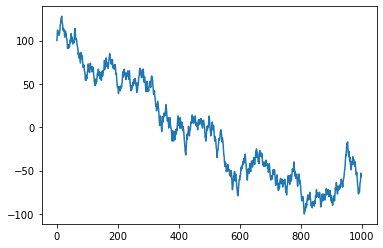

In [9]:
plt.plot(price)

Does this plot resemble the short-term movement of the stock market?

**Observations**:

Performing one time step per day may not be enough to fully capture the randomness of the motion of the market. In practice, these N steps would really represent what the price might be in some shorter period of time (much less than a whole day).

Furthermore, performing a single numerical experiment will not give us a realistic expectation of what the price of the stock might be after a certain amount of time since the stock market with no moving forces consists of random movements.

Run the code snippet above several times (just do shift-enter again and again). What happens to the asset price after N days?

We will be running several numerical experiments that simulates the price variation over N days. Wrap the code snippet above in the function `simulate_asset_price` that takes `N` and `p0` as argument and returns the array `price`. Recall that the first entry of `price` must be the initial price defined as `p0`. Note that the length of `price` should be `N`.

**Hint: Make sure you are not using any other random function inside `simulate_asset_price`, except `step`**. Otherwise, our tests will not be able to grade your code correctly. You should keep this in mind when writing all the other functions in this notebook.

In [10]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
def simulate_asset_price(N,p0):
    # N: numpber of days
    # p0: initial price 
    # price: 1d numpy array with price fluctuations and shape (N,)
    
    price = [p0]
    while len(price) < N:
        price.append(price[-1] + step())
    price = np.array(price)
    
    return price

After your write your function, run the code snippet below:

In [11]:
np.random.seed(30)
simulate_asset_price(10,10)

array([ 10,   4,  -2,   3,   0,  -4,  -8, -10, -16, -20])

Make sure you have the same output as the array shown below before grading, or you may have called the function step() more times than it is actually necessary.

array([ 10,   4,  -2,   3,   0,  -4,  -8, -10, -16, -20])

#### b) Performing M=10 different numerical experiments, each one with N = 1000 days

You will now perform M=10 numerical experiment, in each one computing the array `price` using N = 1000 days.

Define the 2d numpy array `price_M` with shape `(N,M)`, where each column stores the array `price` for each numerical experiment. 

**Use your already defined function `simulate_asset_price` with `p0 = 200`.** Do not use any other random function in your code snippet.


In [13]:
N = 1000 # days
M = 10   # number of numerical experiments
p0 = 200 # initial asset price

In [21]:
price_M = []

for i in range(0, M):
    price_M.append(simulate_asset_price(N, p0))

price_M = np.ndarray(price_M)
price_M = price_M.T

TypeError: only integer scalar arrays can be converted to a scalar index

Then you can plot your results using:

In [ ]:
plt.figure()
plt.plot(price_M);
plt.title ('M numerical experiments');
plt.xlabel('Day');
plt.ylabel('Price');

Try running the above cells a few times. You will see your results are going to look different each time! 


Write the function `predict_stock_prices` with the following signature:

```python
def predict_stock_prices(M,N,p0):
    
    # write code here
    
    return (predicted_prices, expected_value)
```

Your function will include the code snippet above that computes `price_M` for the given arguments `(M,N,p0)`, and use `price_M` to compute:

- `predicted_prices`: 1d numpy array with shape `(M,)` that contains the predicted asset prices for day "N" for all the "M" numerical experiments. Note that day "N" is the last day of each experiment.

- `expected_value`: the “expected value”(mean value) for the stock on the last day "N".

**Make sure your function `predict_stock_prices` does not call any other random function, except the one already included in the `simulate_asset_price` function.**

In [25]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
def predict_stock_prices(M,N,p0):
    # M: number of numerical experiments
    # N: numpber of days
    # p0: initial price 
    
    price_M = []
    for i in range(0, M):
        price_M.append(simulate_asset_price(N, p0))

    price_M = np.array(price_M)
    price_M = price_M.T
    
    # Use price to compute the following:
    predicted_prices = price_M[N - 1, :]
    expected_value = np.mean(predicted_prices)
    
    
    return (predicted_prices, expected_value)

After your write your function, run the code snippet below:

In [26]:
pred_price, ev = predict_stock_prices(50,1000,400)

Plot the histogram of the predicted price:

the expected value for the asset is:  382.14


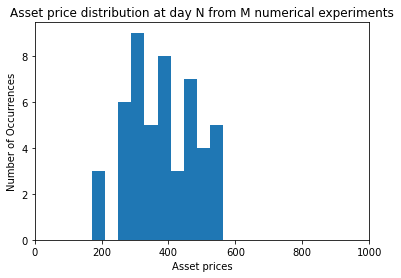

In [27]:
plt.figure()
plt.hist(pred_price);
plt.title('Asset price distribution at day N from M numerical experiments')
plt.xlabel('Asset prices')
plt.ylabel('Number of Occurrences')
plt.xlim([0,1000])

print("the expected value for the asset is: ", ev)

Try to add more numerical experiments!

the expected value for the asset is:  402.962


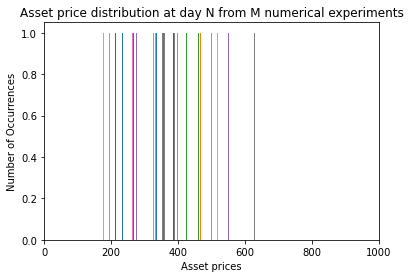

In [20]:
pred_price, ev = predict_stock_prices(500,1000,400)

plt.figure()
plt.hist(pred_price);
plt.title('Asset price distribution at day N from M numerical experiments')
plt.xlabel('Asset prices')
plt.ylabel('Number of Occurrences')
plt.xlim([0,1000])


print("the expected value for the asset is: ", ev)

There is one problem with our simple model. Our model does not incorporate any information about our specific stock other than the starting price. In order to get a more accurate model, we need to find a way incorporate the previous price of the stock. In the next example, we explore another model for stock price behavior.